# Import:

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Large, VGG16, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Dataset:

In [4]:
mydir = r'D:\Course\Mtech- CS\SummerProject&Desartation\Original_dataset(7-class)'
categories = ['CR_Embedded_Scab','CR_Rolled_in_Scale','CR_SCALE_RIS','CR_Sliver_NMI','HR_Scab_Patch','HR_Sliver_NMI','HR_Sliver_Slab_Stage']

# Labeling the Dataset:
1. Gathering the data of all classes and stored into a list called 'data'
2. Labeling the data into its correspoding classes as: 
    'CR_Embedded_scab' --> 0, 
    'CR_Rolled_in_Scale' ---> 1, 
    'CR_SCALE_RIS' ---> 2, 
    'CR_Sliver_NMI' ---> 3, 
    'HR_Scab_Patch' ---> 4, 
    'HR_Sliver_NMI' ---> 5, 
    'HR_Sliver_Slab_Stage' ---> 6

In [5]:
# Load data
data = []
for label, category in enumerate(categories):
    folder_path = os.path.join(mydir, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (512, 512))

        data.append([img , label])


In [9]:
print(data[0][0][0])

[[121 128 137]
 [118 126 133]
 [117 123 130]
 ...
 [114 119 122]
 [120 124 129]
 [122 128 133]]


# Shuffle:

In [4]:
random.shuffle(data)

# Separate features (x) and labels (y):

In [5]:
x = np.array([entry[0] for entry in data])
y = np.array([entry[1] for entry in data])

# normalizing the data:

In [6]:
x = x.astype('float32')/255

cheaking x and its shape

In [7]:
print(x.shape)
print(y.shape)
# print(x)

(780, 512, 512, 3)
(780,)


# Split data into train and test sets:

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(624, 512, 512, 3)
(156, 512, 512, 3)
(624,)
(156,)


# Display some images:

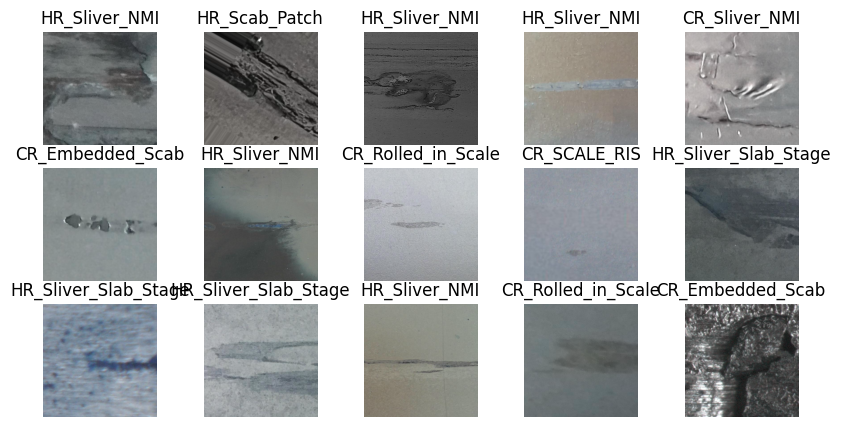

In [10]:
fig, axes = plt.subplots(ncols=5, nrows=3, sharex=True, sharey=False, figsize=(10, 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i in range(15):
    axes[i].set_title(categories[int(y_train[i])])
    axes[i].imshow(x_train[i])
    axes[i].axis('off')

# Define a function to build and compile:

In [11]:
def build_model(base_model):
    base_model.trainable = False  # Freeze the base model
    inputs = tf.keras.Input(shape=(512, 512, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(len(categories), activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# List of models to compare:

In [12]:
models = {
    "MobileNetV1": build_model(MobileNet(weights='imagenet', include_top=False)),
    "MobileNetV2": build_model(MobileNetV2(weights='imagenet', include_top=False)),
    "MobileNetV3": build_model(MobileNetV3Large(weights='imagenet', include_top=False)),
    "VGG16": build_model(VGG16(weights='imagenet', include_top=False)),
    "ResNet50": build_model(ResNet50(weights='imagenet', include_top=False))
}

/tmp/ipykernel_819842/1848626018.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV1": build_model(MobileNet(weights='imagenet', include_top=False)),
2024-08-08 16:07:35.540174: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20543 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:18:00.0, compute capability: 8.9
/tmp/ipykernel_819842/1848626018.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV2": build_model(MobileNetV2(weights='imagenet', include_top=False)),
/home/dnn5/.local/lib/python3.10/site-packages/keras/src/applications/mobilenet_v3.py:512: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224.

# Summary of the models:

In [13]:
for name, model in models.items():
    model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 16, 16, 1024)   │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,410,567 (16.82 MB)

 Trainable params: 1,181,703 (4.51 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 16, 16, 1280)   │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,701,831 (14.12 MB)

 Trainable params: 1,443,847 (5.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobilenetV3large (Functional)   │ (None, 16, 16, 960)    │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │       984,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,112,519 (15.69 MB)

 Trainable params: 1,116,167 (4.26 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 16, 16, 512)    │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,372,103 (58.64 MB)

 Trainable params: 657,415 (2.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 16, 16, 2048)   │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,817,991 (98.49 MB)

 Trainable params: 2,230,279 (8.51 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

# Train and Evaluate each model:

In [14]:
histories = {}
results = {}
epochs = 30
batch_size = 32

for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    
    # Store the history
    histories[name] = history
    
    print(f"Evaluating {name}...")
    results[name] = model.evaluate(x_test, y_test, batch_size=batch_size)
    
    y_pred = np.argmax(model.predict(x_test), axis=-1)
    
    # Convert y_test to label indices if one-hot encoded
    if y_test.ndim > 1 and y_test.shape[-1] > 1:
        y_true = np.argmax(y_test, axis=-1)
    else:
        y_true = y_test  # Already in label format
    
    report = classification_report(y_true, y_pred, target_names=categories)
    print(f"Classification Report for {name}:\n{report}")


Training MobileNetV1...
Epoch 1/30


I0000 00:00:1723113465.968861  820001 service.cc:145] XLA service 0x74f798001680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723113465.968943  820001 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-08-08 16:07:46.053859: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-08 16:07:46.418997: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8902
I0000 00:00:1723113467.183311  820064 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1691', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1723113467.306105  820067 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1930', 40 bytes spill stores, 40 bytes spill loads

I0000 00

 5/20 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3367 - loss: 1.8723

I0000 00:00:1723113471.879357  820001 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.4963 - loss: 1.4497

I0000 00:00:1723113479.543271  820405 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_681', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1723113479.861042  820397 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_688', 260 bytes spill stores, 260 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 591ms/step - accuracy: 0.5022 - loss: 1.4312 - val_accuracy: 0.8333 - val_loss: 0.4781
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7321 - loss: 0.5898 - val_accuracy: 0.8141 - val_loss: 0.3371
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7728 - loss: 0.4625 - val_accuracy: 0.8526 - val_loss: 0.3087
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8009 - loss: 0.4456 - val_accuracy: 0.8397 - val_loss: 0.2807
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8158 - loss: 0.3323 - val_accuracy: 0.8205 - val_loss: 0.3043
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8462 - loss: 0.2893 - val_accuracy: 0.8333 - val_loss: 0.2586
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8389 - loss: 0.2968 - val_accuracy: 0.8782 - val_loss: 0.2819
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8362 - loss: 0.2671 - val_accuracy: 0.8205 - val_loss: 

I0000 00:00:1723113524.170979  822331 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1650', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1723113524.193133  822329 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1650', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1723113524.235624  822327 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1411', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1723113524.257034  822321 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1650', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1723113524.352497  822326 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1411', 244 bytes spill stores, 244 bytes spill loads



19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3569 - loss: 2.0378

I0000 00:00:1723113530.365875  822393 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1411', 32 bytes spill stores, 32 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.3651 - loss: 2.0059

I0000 00:00:1723113537.748454  822531 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1168', 252 bytes spill stores, 252 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 701ms/step - accuracy: 0.3724 - loss: 1.9770 - val_accuracy: 0.6987 - val_loss: 0.6826
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6689 - loss: 0.7681 - val_accuracy: 0.7885 - val_loss: 0.4407
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7947 - loss: 0.4658 - val_accuracy: 0.8077 - val_loss: 0.4536
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8127 - loss: 0.4130 - val_accuracy: 0.8141 - val_loss: 0.3584
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8198 - loss: 0.3596 - val_accuracy: 0.8205 - val_loss: 0.4149
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8255 - loss: 0.3474 - val_accuracy: 0.8077 - val_loss: 0.3472
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8676 - loss: 0.2654 - val_accuracy: 0.8269 - val_loss: 0.3172
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8390 - loss: 0.2916 - val_accuracy: 0.7692 - val_loss: 

I0000 00:00:1723113591.705212  824416 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3436', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1723113591.717565  824397 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3436', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1723113591.724913  824418 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3436', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1723113591.774603  824409 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3197', 232 bytes spill stores, 232 bytes spill loads

I0000 00:00:1723113591.879047  824419 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3436', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1723113591.89734

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.2488 - loss: 1.8825

I0000 00:00:1723113607.725549  824608 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1540', 248 bytes spill stores, 248 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 815ms/step - accuracy: 0.2489 - loss: 1.8813 - val_accuracy: 0.2821 - val_loss: 1.8275
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2915 - loss: 1.8373 - val_accuracy: 0.2821 - val_loss: 1.8021
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.3051 - loss: 1.8131 - val_accuracy: 0.2821 - val_loss: 1.8215
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2880 - loss: 1.8210 - val_accuracy: 0.2885 - val_loss: 1.7603
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.3152 - loss: 1.7868 - val_accuracy: 0.2949 - val_loss: 1.7683
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2983 - loss: 1.8214 - val_accuracy: 0.4551 - val_loss: 1.7021
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3736 - loss: 1.7501 - val_accuracy: 0.3462 - val_loss: 1.7226
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3373 - loss: 1.7230 - val_accuracy: 0.4167 - val_loss: 

/home/dnn5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dnn5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dnn5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30


I0000 00:00:1723113653.690541  826486 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1046', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1723113653.705629  826487 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1046', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1723113653.719658  826485 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1046', 32 bytes spill stores, 32 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 633ms/step - accuracy: 0.2980 - loss: 1.8065 - val_accuracy: 0.5064 - val_loss: 1.4414
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.5089 - loss: 1.4466 - val_accuracy: 0.5641 - val_loss: 1.1943
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.4949 - loss: 1.2801 - val_accuracy: 0.5705 - val_loss: 1.1201
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.5496 - loss: 1.1396 - val_accuracy: 0.6474 - val_loss: 0.9704
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.5889 - loss: 1.0356 - val_accuracy: 0.6218 - val_loss: 0.9047
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.6303 - loss: 0.9433 - val_accuracy: 0.6667 - val_loss: 0.8190
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.6045 - loss: 0.9887 - val_accuracy: 0.6731 - val_loss: 0.8220
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.6544 - loss: 0.8779 - val_accuracy: 0.6987 - val

I0000 00:00:1723113750.194022  828580 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5871', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1723113750.233256  828597 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5871', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1723113750.297706  828584 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5632', 184 bytes spill stores, 524 bytes spill loads

I0000 00:00:1723113750.321034  828587 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5871', 32 bytes spill stores, 32 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.1986 - loss: 3.2991

I0000 00:00:1723113763.498847  828781 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1697', 244 bytes spill stores, 244 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 694ms/step - accuracy: 0.1992 - loss: 3.2787 - val_accuracy: 0.2885 - val_loss: 1.9095
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.2644 - loss: 2.0012 - val_accuracy: 0.4487 - val_loss: 1.8844
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.3548 - loss: 1.9063 - val_accuracy: 0.4103 - val_loss: 1.8256
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.3311 - loss: 1.8641 - val_accuracy: 0.3462 - val_loss: 1.8151
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.2601 - loss: 1.9240 - val_accuracy: 0.4423 - val_loss: 1.6804
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.3339 - loss: 1.7907 - val_accuracy: 0.4359 - val_loss: 1.6524
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.3758 - loss: 1.7584 - val_accuracy: 0.2949 - val_loss: 1.7299
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.3360 - loss: 1.7486 - val_accuracy: 0.4487 - val_loss: 

/home/dnn5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dnn5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dnn5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Print the results:

In [15]:
for name, result in results.items():
    print(f"{name} - Loss: {result[0]}, Accuracy: {result[1]}")

MobileNetV1 - Loss: 0.30247464776039124, Accuracy: 0.807692289352417
MobileNetV2 - Loss: 0.33163878321647644, Accuracy: 0.8589743375778198
MobileNetV3 - Loss: 1.5129669904708862, Accuracy: 0.44871795177459717
VGG16 - Loss: 0.4454217851161957, Accuracy: 0.7628205418586731
ResNet50 - Loss: 1.584621787071228, Accuracy: 0.45512819290161133


# plot the training history for each model:

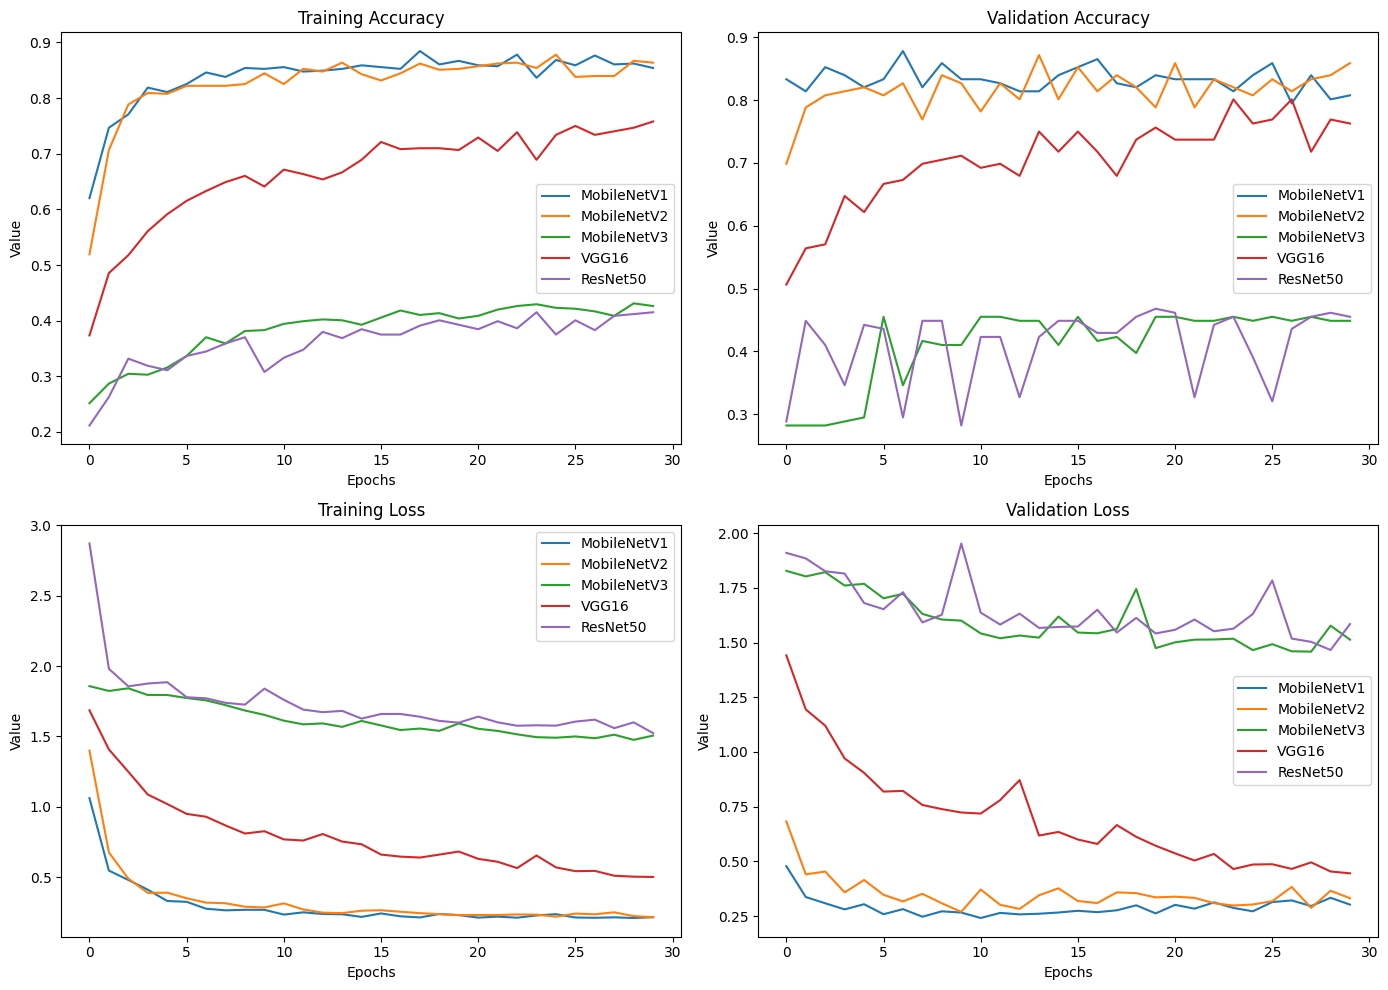

In [17]:
import matplotlib.pyplot as plt

def plot_history(histories):
    # Create a figure with two rows and two columns of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot Accuracy
    for name, history in histories.items():
        if 'accuracy' in history.history:
            axes[0, 0].plot(history.history['accuracy'], label=name)
        else:
            print(f"Warning: 'accuracy' not found for model '{name}'. Available keys: {list(history.history.keys())}")

        if 'val_accuracy' in history.history:
            axes[0, 1].plot(history.history['val_accuracy'], label=name)
        else:
            print(f"Warning: 'val_accuracy' not found for model '{name}'. Available keys: {list(history.history.keys())}")

    # Plot Loss
    for name, history in histories.items():
        if 'loss' in history.history:
            axes[1, 0].plot(history.history['loss'], label=name)
        else:
            print(f"Warning: 'loss' not found for model '{name}'. Available keys: {list(history.history.keys())}")

        if 'val_loss' in history.history:
            axes[1, 1].plot(history.history['val_loss'], label=name)
        else:
            print(f"Warning: 'val_loss' not found for model '{name}'. Available keys: {list(history.history.keys())}")

    # Set titles and labels
    axes[0, 0].set_title('Training Accuracy')
    axes[0, 1].set_title('Validation Accuracy')
    axes[1, 0].set_title('Training Loss')
    axes[1, 1].set_title('Validation Loss')

    for ax in axes.flat:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Value')
        ax.legend()
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Call the plot_history function
plot_history(histories)
